                    Feature  Coefficient  Exp(Coefficient)
0               mean radius    -1.768615          0.170569
1              mean texture    -1.683654          0.185694
2            mean perimeter    -1.721853          0.178735
3                 mean area    -1.464115          0.231283
4           mean smoothness    -0.611027          0.542793
5          mean compactness    -0.351329          0.703752
6            mean concavity    -1.296870          0.273386
7       mean concave points    -2.010308          0.133947
8             mean symmetry    -0.481004          0.618163
9    mean fractal dimension     0.818739          2.267638
10             radius error    -1.132073          0.322364
11            texture error    -0.058962          0.942743
12          perimeter error    -0.852933          0.426163
13               area error    -0.745262          0.474610
14         smoothness error    -0.039343          0.961421
15        compactness error     0.672488          1.9591

C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


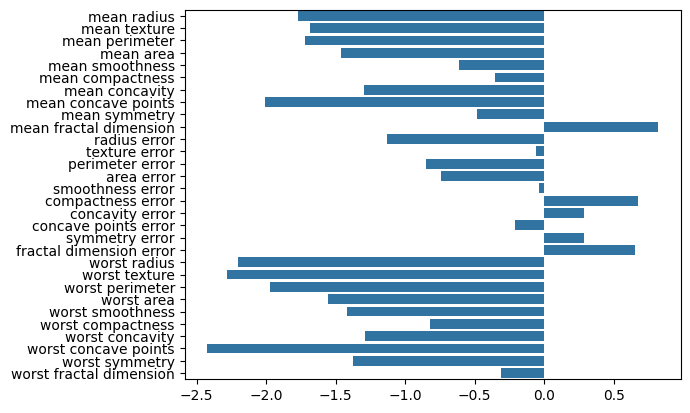

In [1]:
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from ucimlrepo import fetch_ucirepo
import os
from interpret import show
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import numpy as np
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import statsmodels
import seaborn as sns
import pandas as pd
set_visualize_provider(InlineProvider())


# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target variable (0 for malignant, 1 for benign)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


def get_normalization(X):
    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X)
    return X_normalized


X_train = get_normalization(X_train)
X_test = get_normalization(X_test)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Retrieve the feature names and coefficients
feature_names = data.feature_names
coefficients = model.coef_[0]


# Calculate the exponentiated coefficients
exp_coefficients = np.exp(coefficients)

# Create a DataFrame to display the coefficients and their exponentiated values
coef_table = pd.DataFrame(
    {'Feature': feature_names, 'Coefficient': coefficients, 'Exp(Coefficient)': exp_coefficients})

sns.barplot(x=coefficients, y=feature_names, legend=False)

# Display the table
print(coef_table)

train_data = pd.read_csv("./datasets/titanic.csv")
train_data = train_data.dropna()
train_data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {
                   'S': 0, 'C': 1, 'Q': 2}}, inplace=True)
train_data = train_data.drop(
    columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
X = train_data.drop(columns=['Survived'], axis=1)
Y = train_data['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2)
model = LogisticRegression(max_iter=2000)
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)

training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy*100, '%')
# Retrieve the feature names and coefficients
feature_names = X.columns
coefficients = model.coef_[0]


# Calculate the exponentiated coefficients
exp_coefficients = np.exp(coefficients)

# Create a DataFrame to display the coefficients and their exponentiated values
coef_table = pd.DataFrame(
    {'Feature': feature_names, 'Coefficient': coefficients, 'Exp(Coefficient)': exp_coefficients})


# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets


# variable information
print(car_evaluation.variables)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

encoder = ce.OrdinalEncoder(
    cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
# import Random Forest classifier


# instantiate the classifier
rfc = RandomForestClassifier(n_estimators=10, random_state=0)


# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(
    accuracy_score(y_test, y_pred)))




permutation feature importance

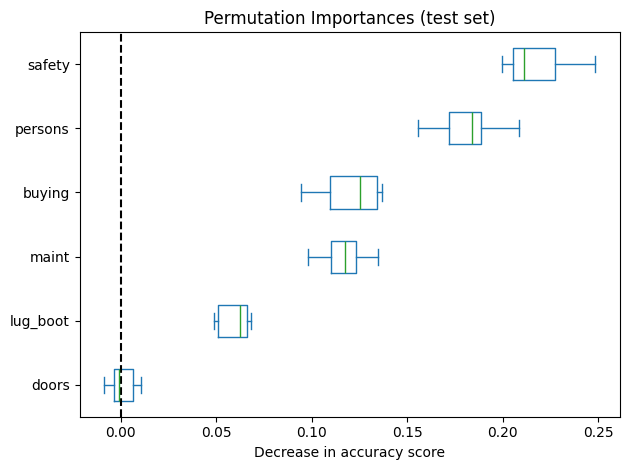

In [4]:
result = permutation_importance(
    rfc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()



C:\Users\versu\AppData\Local\Temp\ipykernel_11556\332444381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=sorted_df, palette='viridis')


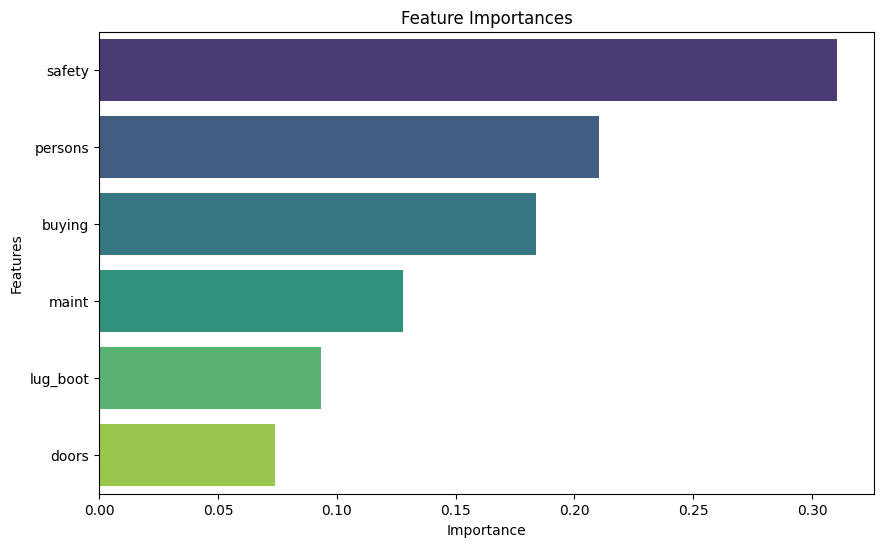

<Axes: ylabel='None'>

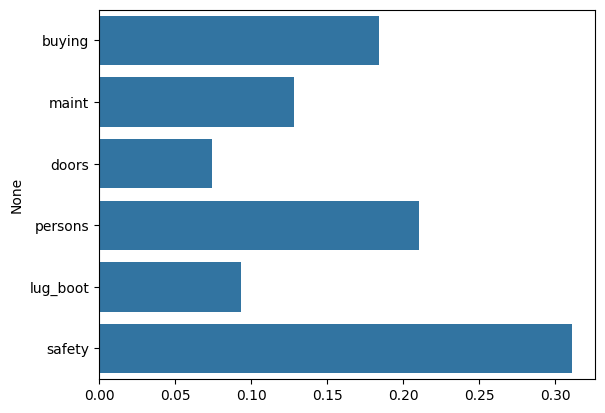

In [7]:
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rfc.feature_importances_})

# Sort the DataFrame by the 'Importance' column in descending order
sorted_df = feature_importance_df.sort_values('Importance', ascending=False)

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='Importance', y='Feature', data=sorted_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
sns.barplot(x=rfc.feature_importances_, y=X_train.columns)


Mean cross-validation score: 0.96
K-fold CV average score: 0.96


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

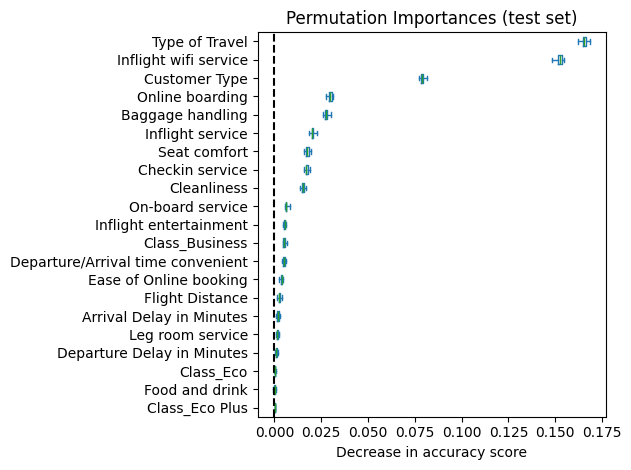

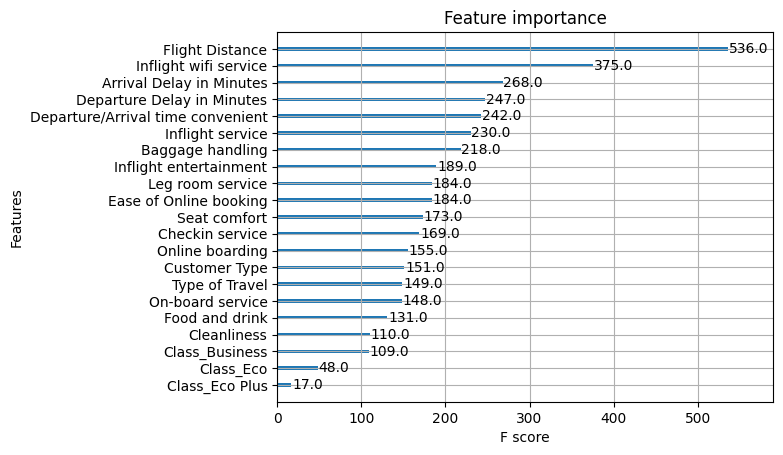

In [44]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier, plot_importance
df = pd.read_csv('./datasets/train_airline_customer_satisfication.csv')
df.dropna()
df.drop(['Unnamed: 0','id'], axis=1, inplace=True)
df.drop(['Age','Gender','Gate location'], axis=1, inplace=True)
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
df = pd.get_dummies(df)

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier(random_state=421)

xgbc = XGBClassifier()

xgbc.fit(X_train, y_train)

# - cross validataion
scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

ypred = xgbc.predict(X_test)
# cm = confusion_matrix(y_test,ypred)
# disp = ConfusionMatrixDisplay(cm)
# disp.plot()
# accuracy_score(y_test,ypred)
result = permutation_importance(
    xgbc, X_test, y_test, n_repeats=20, random_state=42, n_jobs=5
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)

ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

# orig_feature_names = X_train.columns
# feature_important = xgbc.feature_importances_
# keys = list(feature_important.keys())
# values = list(feature_important.values())

# data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score")#, ascending=False)
# ax =data.plot(kind='barh', figsize = (20,10))
# ax.set_yticklabels(orig_feature_names); ## plot top features
# ax.set_xlabel("F-Score")
# ax.set(xlabel="F-Score", ylabel="Featurese")
# ax.set_title('Feature Importance')
plot_importance(xgbc)


Support vector machine for credit card fraud detection